# Bitcoin Price Prediction

Recently Bitcoin has received a lot of attention from the media and the public due to its recent price hike. As Bitcoin has been viewed as a financial asset and is traded through many cryptocurrency exchanges like a stock market, many researchers have studied various factors that affect the price of Bitcoin and the patterns behind its ﬂuctuations using various analytical and predictive methods.

Several predictive methods have been studied and compared for the task bitcoin price prediction using machine learning. In this article, I will be using the Facebook Prophet model for the task of Bitcoin price prediction using machine learning with Python.


The Facebook Prophet Library is an open-source additive regression model made available by Facebook for time-series predictions. While there is a more advanced version of the Prophet like NeuralProphet which is based on neural networks, I will be using the simplified version which uses machine learning techniques for the Bitcoin price prediction task. If you want to know more about how the Facebook Prophet template works, you can learn here.

Dataset :- https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

In [22]:
import pandas as pd #for data analysis

from fbprophet import Prophet #tym series analysis package used for forcasting procedure 
from fbprophet.plot import plot #for ploting tym series

In [23]:
#load the dataset 2 pandas data frame for manupulating the data
data = pd.read_csv('BTC-USD.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "data"
btc_data = data.where((pd.notnull(data)), '')

#lets check the shape of the dataset
btc_data.shape

(366, 7)

In [24]:
#printing the dataset
print(btc_data)

           Date          Open  ...     Adj Close        Volume
0    2021-01-09  40788.640625  ...  40254.546875   61984162837
1    2021-01-10  40254.218750  ...  38356.441406   79980747690
2    2021-01-11  38346.531250  ...  35566.656250  123320567399
3    2021-01-12  35516.359375  ...  33922.960938   74773277909
4    2021-01-13  33915.121094  ...  37316.359375   69364315979
..          ...           ...  ...           ...           ...
361  2022-01-05  45899.359375  ...  43569.003906   36851084859
362  2022-01-06  43565.511719  ...  43160.929688   30208048289
363  2022-01-07  43153.570313  ...  41557.902344   84196607520
364  2022-01-08  41561.464844  ...  41733.941406   28066355845
365  2022-01-09  41651.171875  ...  41863.730469   28104372224

[366 rows x 7 columns]


### Printing the head of the dataset to have a look at the dataframe

In [25]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
btc_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837
1,2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690
2,2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567399
3,2021-01-12,35516.359375,36568.527344,32697.976563,33922.960938,33922.960938,74773277909
4,2021-01-13,33915.121094,37599.960938,32584.667969,37316.359375,37316.359375,69364315979
5,2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,63615990033
6,2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,36825.367188,67760757881
7,2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,36178.140625,57706187875
8,2021-01-17,36163.648438,36722.351563,34069.320313,35791.277344,35791.277344,52359854336
9,2021-01-18,35792.238281,37299.285156,34883.843750,36630.074219,36630.074219,49511702429


In [26]:
#last 10 rows of the dataset
btc_data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
356,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400
357,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
358,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
359,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
360,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
361,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
362,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
363,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
364,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
365,2022-01-09,41651.171875,42107.851563,41554.332031,41863.730469,41863.730469,28104372224


The Facebook Prophet model only works with data that contains a string time-series format in a column called “ds” and continuous values in a column called “y”. So we need to create the data accordingly:

In [27]:
#getting only 2 columns of the data
btc_data = btc_data[["Date", "Close"]]

#naming those 2 columns
btc_data.columns = ["ds", 'y']

#printing the data
btc_data

,ds,y
0,2021-01-09,40254.546875
1,2021-01-10,38356.441406
2,2021-01-11,35566.656250
3,2021-01-12,33922.960938
4,2021-01-13,37316.359375
...,...,...
361,2022-01-05,43569.003906
362,2022-01-06,43160.929688
363,2022-01-07,41557.902344
364,2022-01-08,41733.941406


Now let’s fit the data into our model:

In [28]:
#loading the Prophet 2 the variable "prophet" 
#training the Prophet Model wyt btc_data
#& fitting the data wyt the btc_data 2 the model so the model is trained with the data
prophet = Prophet().fit(btc_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now let’s make predictions. The make_future_dataframe method in Prophet model has a parameter named as ‘periods’, we can use it to set the amount of time we need to make predictions. Now let’s make predictions for the next 365 days:

In [29]:
#Simulate the trend using the extrapolated generative model wyt a tym period of 1 yr
future = prophet.make_future_dataframe(periods = 365)

#printing the data
print(future)

            ds
0   2021-01-09
1   2021-01-10
2   2021-01-11
3   2021-01-12
4   2021-01-13
..         ...
726 2023-01-05
727 2023-01-06
728 2023-01-07
729 2023-01-08
730 2023-01-09

[731 rows x 1 columns]


In [30]:
#predicting the future values 
forecast = prophet.predict(future)

#printing only few columns of the predicted data
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-09,33684.743474,27919.809678,39464.074407
1,2021-01-10,34048.441298,28171.298781,39667.349508
2,2021-01-11,34398.291622,29002.719785,39644.124953
3,2021-01-12,34462.093994,29387.465296,40432.060263
4,2021-01-13,34914.357604,29381.181290,40064.400237
...,...,...,...,...
726,2023-01-05,-6667.141143,-117373.178582,108457.647275
727,2023-01-06,-6702.792134,-117094.781992,107529.609991
728,2023-01-07,-6719.169962,-118436.697505,108117.425006
729,2023-01-08,-6825.282421,-120512.311401,107982.667316


Now let’s plot our predictions:

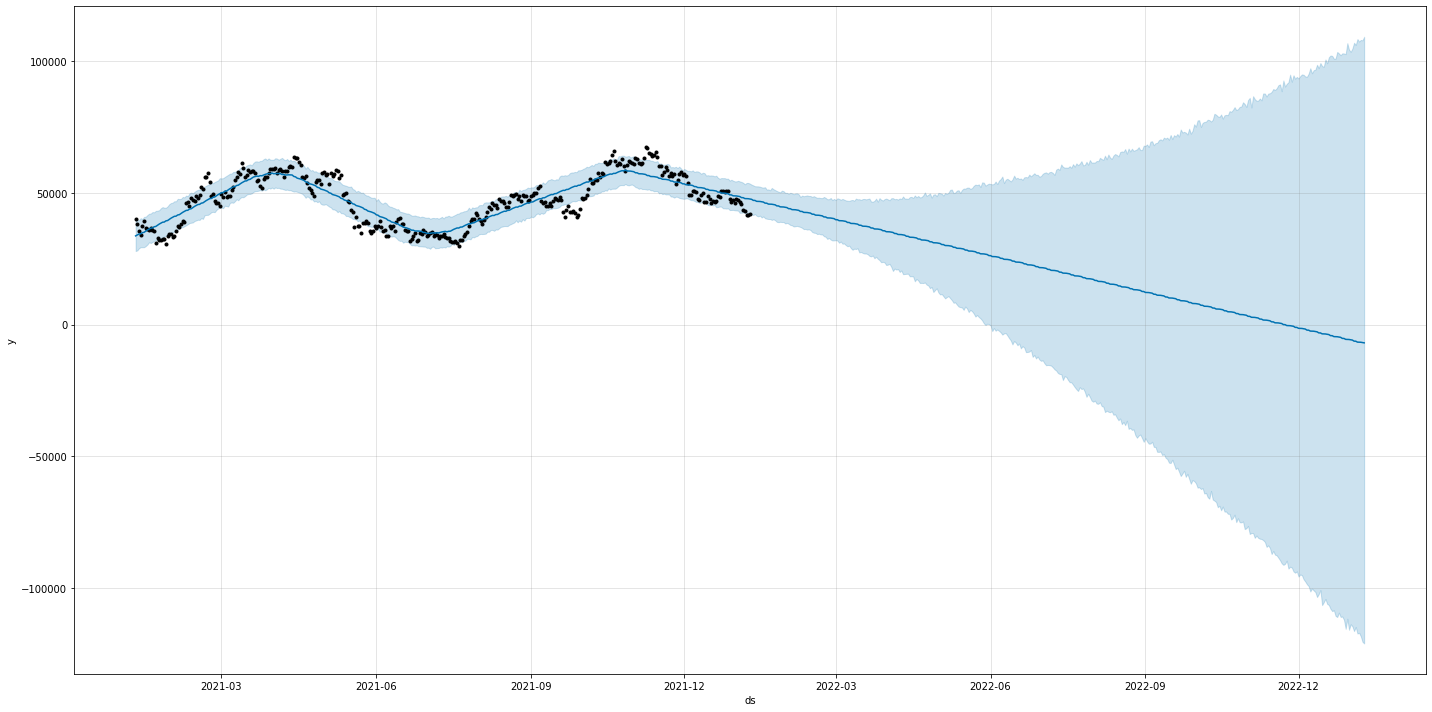

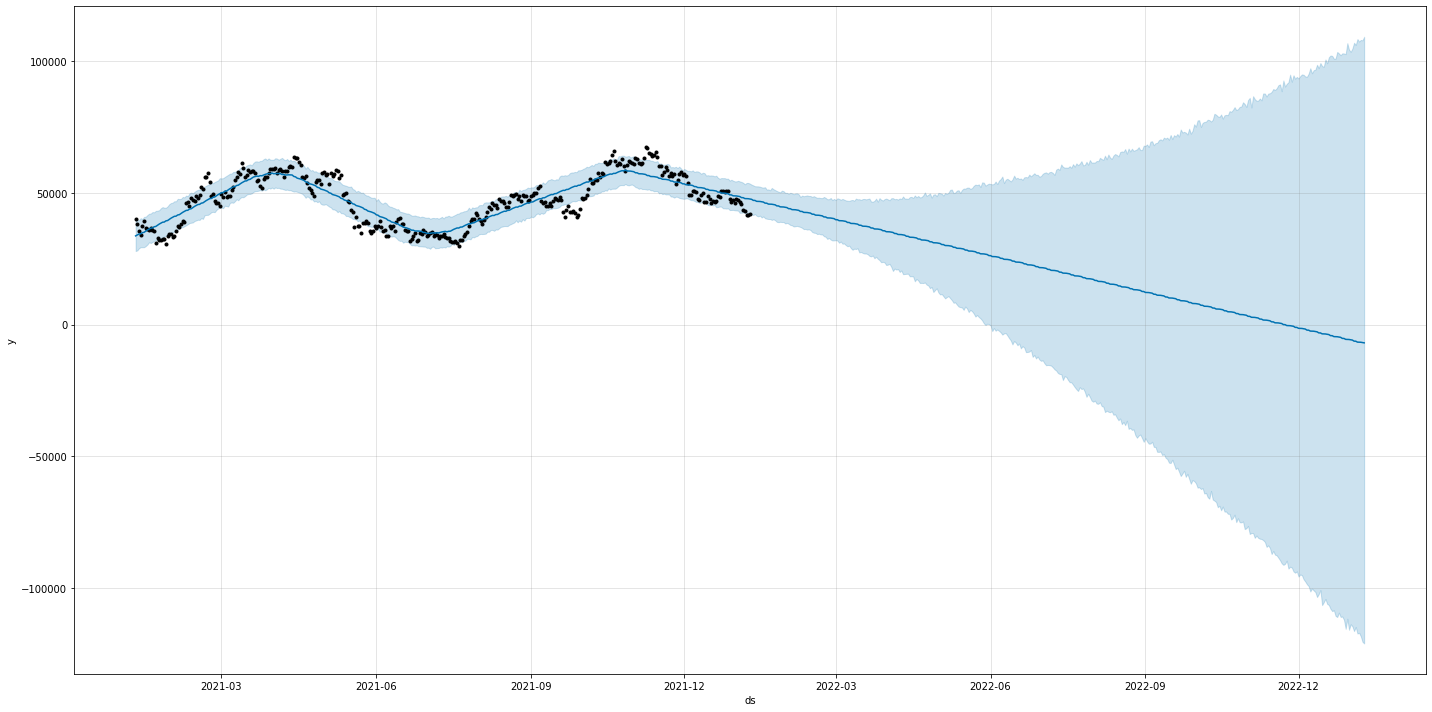

In [31]:
#ploting our predicted data
prophet.plot(forecast, figsize = (20, 10))

## Conclusion
There are several interpretations of the forecasts calculated by the Facebook prophet model like the current momentum for the bitcoin prices has sky-rocketed, and still, we are likely to see a very rapid increase in the prices of bitcoin. I hope you liked this project on Bitcoin Price Prediction with Python using Machine Learning.